**Task 1: Exploratory Data Analysis**

### Objective:
The goal of this task is to explore the provided datasets (`Customers`, `Products`, and `Transactions`) to understand data trends, derive insights, and identify patterns that can guide business strategies.

In [53]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Load datasets
customers = pd.read_csv('/Customers.csv')
products = pd.read_csv('/Products.csv')
transactions = pd.read_csv('/Transactions.csv')

In [55]:
# Data Overview
print(customers.info())
print(products.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [56]:
# Summary Statistics
print(customers.describe())
print(products.describe())
print(transactions.describe())


       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


<ipython-input-57-871b3bce270d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers, palette='viridis')


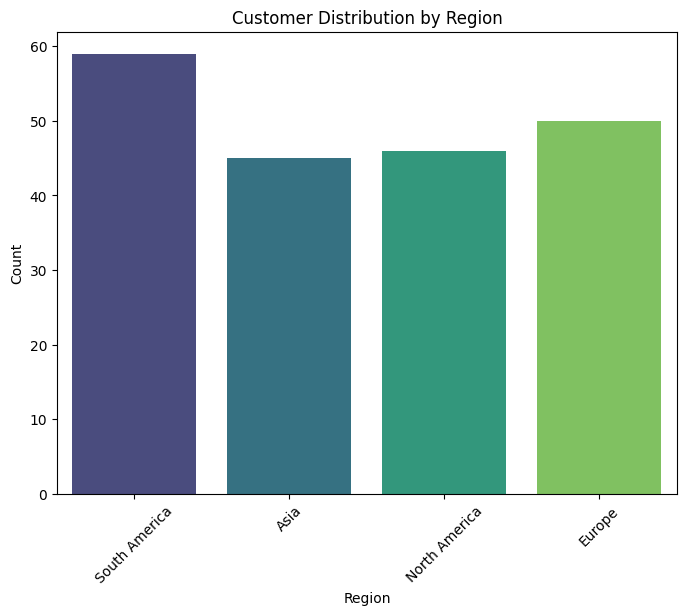

In [57]:
# Visualizations
# Customers by Region
plt.figure(figsize=(8, 6))
sns.countplot(x='Region', data=customers, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-58-97e926b17216>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Price', data=products, palette='coolwarm')


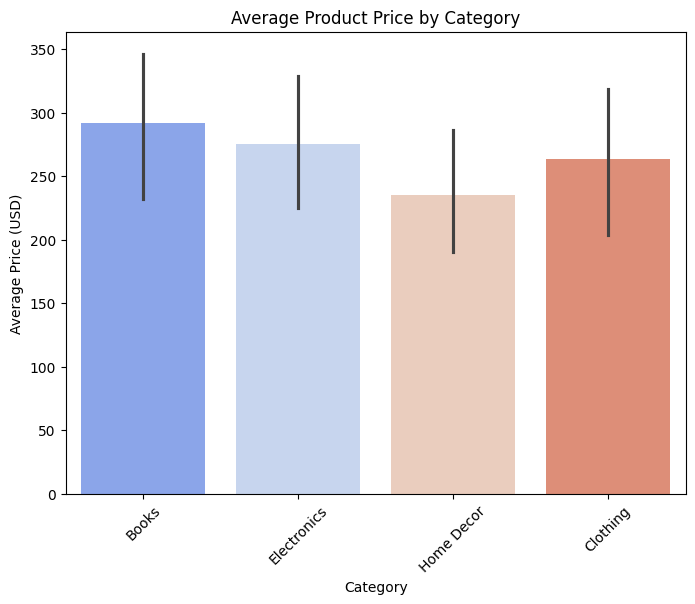

In [58]:
# Average Price by Product Category
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Price', data=products, palette='coolwarm')
plt.title('Average Product Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.show()

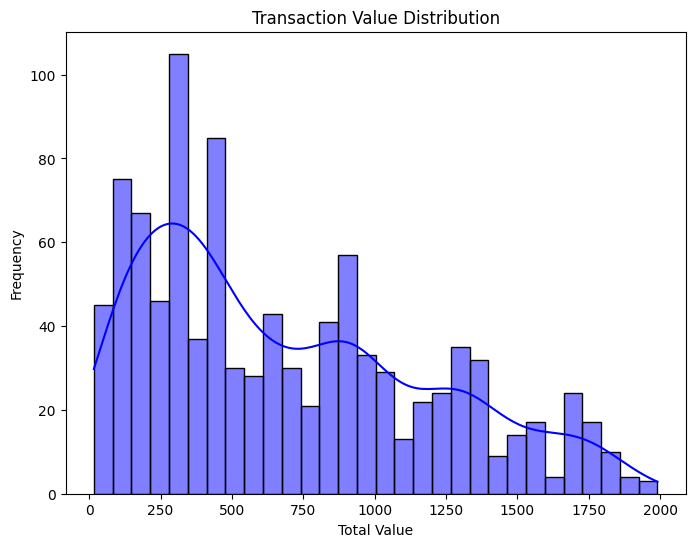

In [59]:
# Transaction Value Distribution
plt.figure(figsize=(8, 6))
sns.histplot(transactions['TotalValue'], kde=True, bins=30, color='blue')
plt.title('Transaction Value Distribution')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

In [60]:
# Business Insights
print("Business Insights:")
# Insight 1: Most frequent region
most_frequent_region = customers['Region'].mode()[0]
print(f"1. The most frequent region of customers is: {most_frequent_region}.")
# Insight 2: Category with highest average price
highest_avg_price_category = products.groupby('Category')['Price'].mean().idxmax()
print(f"2. The product category with the highest average price is: {highest_avg_price_category}.")
# Insight 3: Average transaction value
avg_transaction_value = transactions['TotalValue'].mean()
print(f"3. The average transaction value is: ${avg_transaction_value:.2f}.")
# Insight 4: Most purchased product
most_purchased_product = transactions.groupby('ProductID')['Quantity'].sum().idxmax()
most_purchased_product_name = products.loc[products['ProductID'] == most_purchased_product, 'ProductName'].values[0]
print(f"4. The most purchased product is: {most_purchased_product_name} (Product ID: {most_purchased_product}).")
# Insight 5: Region with highest total transaction value
region_transaction_value = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum()
highest_transaction_region = region_transaction_value.idxmax()
print(f"5. The region with the highest total transaction value is: {highest_transaction_region}, contributing ${region_transaction_value.max():,.2f}.")


Business Insights:
1. The most frequent region of customers is: South America.
2. The product category with the highest average price is: Books.
3. The average transaction value is: $690.00.
4. The most purchased product is: SoundWave Cookbook (Product ID: P054).
5. The region with the highest total transaction value is: South America, contributing $219,352.56.


In [61]:
# Save EDA results to a file
customers.to_csv('Processed_Customers.csv', index=False)
products.to_csv('Processed_Products.csv', index=False)
transactions.to_csv('Processed_Transactions.csv', index=False)

**Task 2: Lookalike Model**

### Objective:
The objective is to identify similar customers based on their purchasing patterns, helping the business design personalized campaigns or cross-sell recommendations.

In [62]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [63]:
# Merge datasets for processing
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [64]:
# Pivot table for customer-product interaction
pivot_table = merged_data.pivot_table(
    values='Quantity',
    index='CustomerID',
    columns='ProductID',
    fill_value=0
)

In [65]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_table)


In [66]:
# Compute cosine similarity
similarity_matrix = cosine_similarity(scaled_data)

In [67]:
# Get top 3 lookalikes for the first 20 customers
lookalike_results = {}
customer_ids = pivot_table.index[:20]

for i, customer_id in enumerate(customer_ids):
    # Retrieve similarity scores for the current customer
    similarity_scores = list(enumerate(similarity_matrix[i]))

    # Sort by similarity score in descending order (exclude self-match)
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:4]

    # Map customer ID to their top 3 similar customers and scores
    lookalike_results[customer_id] = [
        {"CustomerID": pivot_table.index[sim[0]], "SimilarityScore": round(sim[1], 3)} for sim in sorted_scores
    ]


In [68]:
lookalike_output = pd.DataFrame([
    {
        "CustomerID": customer_id,
        "Lookalike1_ID": data[0]["CustomerID"],
        "Lookalike1_Score": data[0]["SimilarityScore"],
        "Lookalike2_ID": data[1]["CustomerID"],
        "Lookalike2_Score": data[1]["SimilarityScore"],
        "Lookalike3_ID": data[2]["CustomerID"],
        "Lookalike3_Score": data[2]["SimilarityScore"],
    }
    for customer_id, data in lookalike_results.items()
])

In [69]:
# Save results to CSV
lookalike_output.to_csv('Sanskruti_Lookalike.csv', index=False)
print("Lookalike Model results saved to 'Sanskruti_Lookalike.csv'.")

Lookalike Model results saved to 'Sanskruti_Lookalike.csv'.


**Task 3: Customer Segmentation (Clustering)**

### Objective:
The objective is to identify similar customers based on their purchasing patterns, helping the business design personalized campaigns or cross-sell recommendations.

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import numpy as np

In [71]:
# Aggregate data for clustering
customer_data = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

In [72]:
# Merge with customer profile information
customer_data = customer_data.merge(customers[['CustomerID', 'Region']], on='CustomerID')

In [73]:
# Select features for clustering
clustering_features = customer_data[['TotalValue', 'Quantity']]

In [74]:
# Normalize the features
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_features)


In [75]:
# Initialize a range of clusters for testing (2 to 10 clusters)
optimal_clusters = None
lowest_db_index = float('inf')

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_data)



In [76]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(normalized_data, cluster_labels)
print(f"Clusters: {n_clusters}, Davies-Bouldin Index: {db_index:.3f}")

Clusters: 10, Davies-Bouldin Index: 0.814


In [77]:
# Identify the optimal number of clusters (minimum DB Index)
if db_index < lowest_db_index:
  lowest_db_index = db_index
  optimal_clusters = n_clusters
  best_kmeans = kmeans


In [78]:
# Use the optimal number of clusters and assign cluster labels
customer_data['Cluster'] = best_kmeans.predict(normalized_data)
print(f"\nOptimal Number of Clusters: {optimal_clusters}")
print(f"Lowest Davies-Bouldin Index: {lowest_db_index:.3f}")



Optimal Number of Clusters: 10
Lowest Davies-Bouldin Index: 0.814


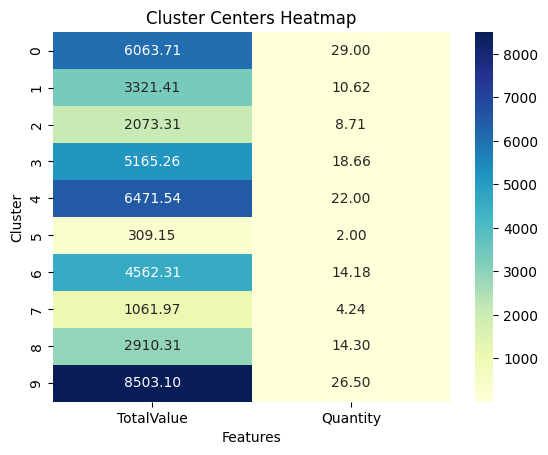

In [81]:
# Visualize cluster centers as a heatmap
cluster_centers = best_kmeans.cluster_centers_

cluster_features = pd.DataFrame(
    scaler.inverse_transform(cluster_centers),
    columns=['TotalValue', 'Quantity']
)
sns.heatmap(cluster_features, annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)
plt.title('Cluster Centers Heatmap')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

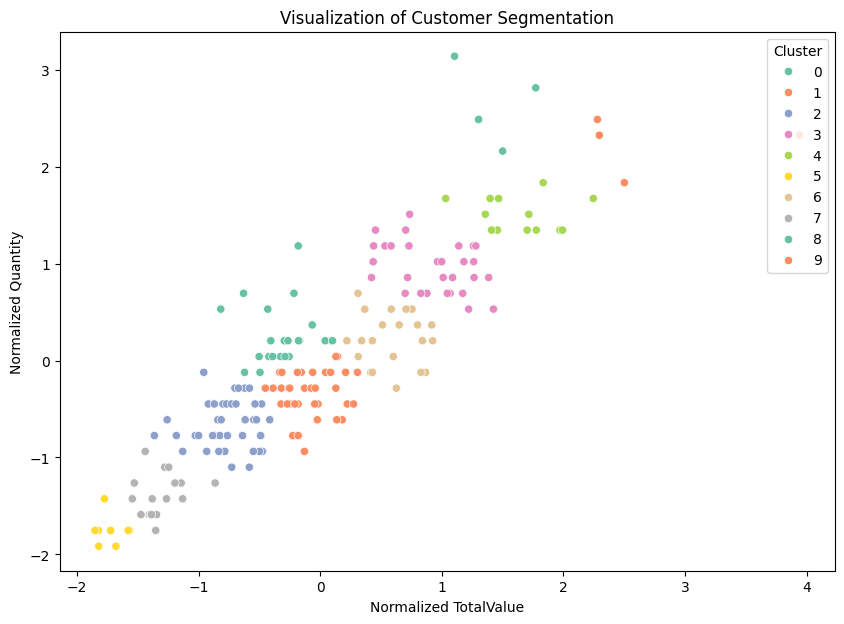

In [79]:
# Step 5: Visualize clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=normalized_data[:, 0],
    y=normalized_data[:, 1],
    hue=customer_data['Cluster'],
    palette='Set2',
    legend='full'
)
plt.title('Visualization of Customer Segmentation')
plt.xlabel('Normalized TotalValue')
plt.ylabel('Normalized Quantity')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [80]:
# Save customer data with cluster assignments
customer_data.to_csv('Sanskruti_Clustering_Results.csv', index=False)
print("Clustering results saved to 'Sanskruti_Clustering_Results.csv'.")

Clustering results saved to 'Sanskruti_Clustering_Results.csv'.
